In [4]:
import numpy as np
import pandas as pd

In [5]:
iris = pd.read_csv(r"C:\Users\etisalat\deep learning\reference\TF_2_Notebooks_and_Data\DATA\iris.csv")

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.shape

(150, 5)

In [8]:
x=iris.drop("species",axis=1)

In [9]:
y=iris["species"]

In [10]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y= encoder.fit_transform(y)

In [12]:
#pd.get_dummies(iris["species"]).values

In [13]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import MinMaxScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [16]:
scaler=MinMaxScaler()
# either we apply (fit) and then (transform) or we can only apply (fit_transform) 
#scaler.fit(x_train)
#scaler.transform(s_train)

# so (fit_transform) is doign the job of both (fit) and (transform)

In [17]:
scaler_x_train=scaler.fit_transform(x_train)

In [37]:
scaler_x_train

array([[0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.33333333, 0.20833333, 0.50847458, 0.5       ],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.69444444, 0.41666667, 0.76271186, 0.83333333],
       [0.38888889, 0.33333333, 0.59322034, 0.5       ],
       [0.66666667, 0.45833333, 0.62711864, 0.58333333],
       [0.44444444, 0.41666667, 0.54237288, 0.58333333],
       [0.36111111, 0.29166667, 0.54237288, 0.5       ],
       [0.94444444, 0.41666667, 0.86440678, 0.91666667],
       [0.22222222, 0.70833333, 0.08474576, 0.125     ],
       [0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.11111111, 0.5       , 0.10169492, 0.04166667],
       [0.66666667, 0.41666667, 0.6779661 , 0.66666667],
       [0.36111111, 0.41666667, 0.59322034, 0.58333333],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.77777778, 0.41666667, 0.83050847, 0.83333333],
       [0.41666667, 0.29166667,

In [18]:
scaler_x_test=scaler.fit_transform(x_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
scaler_x_train[0].shape

(4,)

In [21]:
model=Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
model.add(Dense(units=3,activation="softmax"))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop=EarlyStopping(patience=5)

In [24]:
model.fit(x=scaler_x_train,y=y_train,epochs=250,
        validation_data=(scaler_x_test,y_test),callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/250
120/120 [==============================] - 2s 13ms/sample - loss: 1.2391 - accuracy: 0.2917 - val_loss: 1.1992 - val_accuracy: 0.3000
Epoch 2/250
120/120 [==============================] - 0s 575us/sample - loss: 1.2323 - accuracy: 0.2917 - val_loss: 1.1945 - val_accuracy: 0.3000
Epoch 3/250
120/120 [==============================] - 0s 850us/sample - loss: 1.2251 - accuracy: 0.2917 - val_loss: 1.1900 - val_accuracy: 0.3000
Epoch 4/250
120/120 [==============================] - 0s 450us/sample - loss: 1.2181 - accuracy: 0.2917 - val_loss: 1.1857 - val_accuracy: 0.3000
Epoch 5/250
120/120 [==============================] - 0s 558us/sample - loss: 1.2128 - accuracy: 0.2917 - val_loss: 1.1818 - val_accuracy: 0.2667
Epoch 6/250
120/120 [==============================] - 0s 850us/sample - loss: 1.2059 - accuracy: 0.2917 - val_loss: 1.1780 - val_accuracy: 0.2667
Epoch 7/250
120/120 [==============================] - 0s 833us/sample - l

120/120 [==============================] - 0s 475us/sample - loss: 1.0634 - accuracy: 0.6500 - val_loss: 1.0832 - val_accuracy: 0.5333
Epoch 112/250
120/120 [==============================] - 0s 483us/sample - loss: 1.0623 - accuracy: 0.6500 - val_loss: 1.0821 - val_accuracy: 0.5333
Epoch 113/250
120/120 [==============================] - 0s 425us/sample - loss: 1.0612 - accuracy: 0.6500 - val_loss: 1.0809 - val_accuracy: 0.5333
Epoch 114/250
120/120 [==============================] - 0s 567us/sample - loss: 1.0599 - accuracy: 0.6500 - val_loss: 1.0799 - val_accuracy: 0.5333
Epoch 115/250
120/120 [==============================] - 0s 433us/sample - loss: 1.0587 - accuracy: 0.6500 - val_loss: 1.0788 - val_accuracy: 0.5333
Epoch 116/250
120/120 [==============================] - 0s 467us/sample - loss: 1.0574 - accuracy: 0.6500 - val_loss: 1.0777 - val_accuracy: 0.5333
Epoch 117/250
120/120 [==============================] - 0s 575us/sample - loss: 1.0562 - accuracy: 0.6500 - val_loss: 1

120/120 [==============================] - 0s 550us/sample - loss: 0.8259 - accuracy: 0.6750 - val_loss: 0.8586 - val_accuracy: 0.6000
Epoch 221/250
120/120 [==============================] - 0s 483us/sample - loss: 0.8235 - accuracy: 0.6750 - val_loss: 0.8563 - val_accuracy: 0.6000
Epoch 222/250
120/120 [==============================] - ETA: 0s - loss: 0.8456 - accuracy: 0.65 - 0s 583us/sample - loss: 0.8210 - accuracy: 0.6750 - val_loss: 0.8540 - val_accuracy: 0.6000
Epoch 223/250
120/120 [==============================] - 0s 592us/sample - loss: 0.8187 - accuracy: 0.6750 - val_loss: 0.8516 - val_accuracy: 0.6000
Epoch 224/250
120/120 [==============================] - 0s 850us/sample - loss: 0.8162 - accuracy: 0.6750 - val_loss: 0.8493 - val_accuracy: 0.6000
Epoch 225/250
120/120 [==============================] - 0s 450us/sample - loss: 0.8138 - accuracy: 0.6750 - val_loss: 0.8470 - val_accuracy: 0.6000
Epoch 226/250
120/120 [==============================] - 0s 492us/sample - los

In [25]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.239089,0.291667,1.199161,0.300000
1,1.232266,0.291667,1.194475,0.300000
2,1.225065,0.291667,1.189983,0.300000
3,1.218076,0.291667,1.185717,0.300000
4,1.212761,0.291667,1.181768,0.266667
...,...,...,...,...
245,0.766384,0.683333,0.802312,0.600000
246,0.764276,0.683333,0.800376,0.600000
247,0.762170,0.683333,0.798365,0.600000
248,0.760082,0.683333,0.796398,0.600000


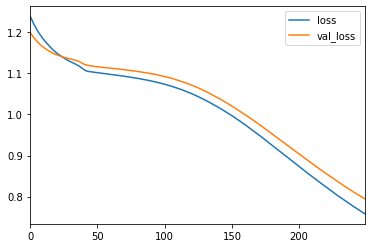

In [26]:
metrics[["loss","val_loss"]].plot()

In [27]:
model.evaluate(scaler_x_test,y_test,verbose=0)

[0.794417679309845, 0.6]

### feeding all data and creating a model

In [28]:
epochs=len(metrics)

In [29]:
epochs

250

In [30]:
scaled_x=scaler.fit_transform(x)

In [39]:
scaled_x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [31]:
model2=Sequential()
model2.add(Dense(units=4,activation='relu',input_shape=[4,]))
model2.add(Dense(units=4,activation="relu"))
model2.add(Dense(units=3,activation="softmax"))

model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [32]:
model2.fit(scaled_x,y,epochs=epochs)

Train on 150 samples
Epoch 1/250
150/150 [==============================] - 1s 5ms/sample - loss: 1.0972 - accuracy: 0.1733
Epoch 2/250
150/150 [==============================] - 0s 320us/sample - loss: 1.0960 - accuracy: 0.3333
Epoch 3/250
150/150 [==============================] - 0s 340us/sample - loss: 1.0951 - accuracy: 0.3333
Epoch 4/250
150/150 [==============================] - 0s 353us/sample - loss: 1.0941 - accuracy: 0.3267
Epoch 5/250
150/150 [==============================] - 0s 307us/sample - loss: 1.0933 - accuracy: 0.3267
Epoch 6/250
150/150 [==============================] - 0s 300us/sample - loss: 1.0925 - accuracy: 0.3267
Epoch 7/250
150/150 [==============================] - 0s 433us/sample - loss: 1.0917 - accuracy: 0.3267
Epoch 8/250
150/150 [==============================] - 0s 393us/sample - loss: 1.0907 - accuracy: 0.3333
Epoch 9/250
150/150 [==============================] - 0s 220us/sample - loss: 1.0897 - accuracy: 0.3333
Epoch 10/250
150/150 [==============

Epoch 151/250
150/150 [==============================] - 0s 247us/sample - loss: 0.6029 - accuracy: 0.6667
Epoch 152/250
150/150 [==============================] - 0s 187us/sample - loss: 0.6017 - accuracy: 0.6667
Epoch 153/250
150/150 [==============================] - ETA: 0s - loss: 0.6483 - accuracy: 0.65 - 0s 207us/sample - loss: 0.6005 - accuracy: 0.6667
Epoch 154/250
150/150 [==============================] - 0s 153us/sample - loss: 0.5994 - accuracy: 0.6667
Epoch 155/250
150/150 [==============================] - 0s 220us/sample - loss: 0.5982 - accuracy: 0.6667
Epoch 156/250
150/150 [==============================] - 0s 187us/sample - loss: 0.5971 - accuracy: 0.6667
Epoch 157/250
150/150 [==============================] - 0s 167us/sample - loss: 0.5959 - accuracy: 0.6667
Epoch 158/250
150/150 [==============================] - 0s 207us/sample - loss: 0.5948 - accuracy: 0.6667
Epoch 159/250
150/150 [==============================] - 0s 180us/sample - loss: 0.5937 - accuracy: 0.

## Saving the model

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### saving our model and scaler

In [33]:
model2.save("final_model.h5")

In [40]:
model2.predict_classes([[0.22222222, 0.625     , 0.06779661, 0.04166667]])

array([0], dtype=int64)

In [41]:
import joblib

In [43]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

### loading the model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
iris_model=load_model(r"C:\Users\etisalat\Deep learning - Sep\final_model.h5")
iris_scaler=joblib.load(r"C:\Users\etisalat\Deep learning - Sep\scaler.pkl")

In [47]:
input=[[5.1,3.5,1.4,0.2]]

In [48]:
scaled_input=iris_scaler.fit_transform(input)

In [49]:
iris_model.predict_classes(scaled_input)

array([0], dtype=int64)

In [53]:
json_input={"sepal_length":5.1,
            "sepal_width":3.5,
            "petal_length":1.4,
            "petal_width":0.2}

### final code for deployment

In [63]:
iris_model=load_model(r"C:\Users\etisalat\Deep learning - Sep\final_model.h5")
iris_scaler=joblib.load(r"C:\Users\etisalat\Deep learning - Sep\scaler.pkl")

def iris_pred(model,scaler,input):
    
    a=input["sepal_length"]
    b=input["sepal_width"]
    c=input["petal_length"]
    d=input["petal_width"]
    
    
    cor_input=[[a,b,c,d]]
    
    classes=np.array(['setosa', 'versicolor', 'virginica'])
    
    scaled_input=scaler.fit_transform(cor_input)
    pred=model.predict_classes(scaled_input)
    
    return pred[0]

In [64]:
iris_pred(model=iris_model,scaler=iris_scaler,input=json_input)

0